In [1]:
import cv2
import mediapipe as mp
import numpy as np
from pathlib import Path


2026-01-22 20:45:16.114184: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2026-01-22 20:45:16.114275: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2026-01-22 20:45:16.137577: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2026-01-22 20:45:16.185718: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import sys
print(sys.executable)

/home/jupyter-antoniodetoro/TFG/entorno/bin/python


In [3]:
!which python

/opt/tljh/user/bin/python


In [4]:
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

pose = mp_pose.Pose(
    static_image_mode=True,   # IMPORTANTE: imágenes, no vídeo
    model_complexity=2,       # 0, 1 o 2 (2 = más preciso, más lento)
    enable_segmentation=False,
    min_detection_confidence=0.5
)


I0000 00:00:1769111176.675865 3113986 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1769111176.789033 3114239 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 560.35.05), renderer: NVIDIA A30/PCIe/SSE2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1769111176.868380 3114174 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1769111176.970480 3114194 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [5]:
def process_image_pose(image_path, draw=True):
    image_path = Path(image_path)
    if not image_path.exists():
        raise FileNotFoundError(f"No existe la imagen: {image_path}")

    # Leer imagen (BGR)
    image_bgr = cv2.imread(str(image_path))
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    # Procesar con MediaPipe
    results = pose.process(image_rgb)

    if results.pose_landmarks and draw:
        mp_drawing.draw_landmarks(
            image_bgr,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style()
        )

    return image_bgr, results.pose_landmarks


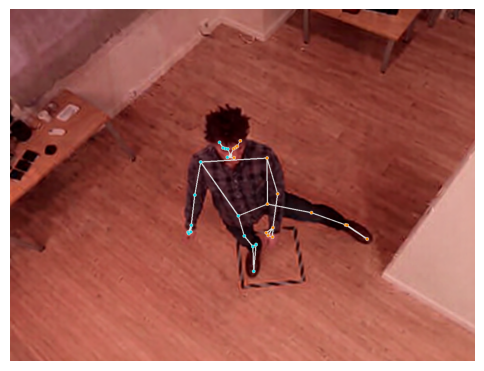

In [15]:
image_path = "fotos_salida/edit_00_16_1680261723343_rgb.png"  # cambia esto

output_image, landmarks = process_image_pose(image_path)

# Mostrar en notebook (sin matplotlib, usando OpenCV-friendly)
output_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 8))
plt.imshow(output_rgb)
plt.axis("off")
plt.show()


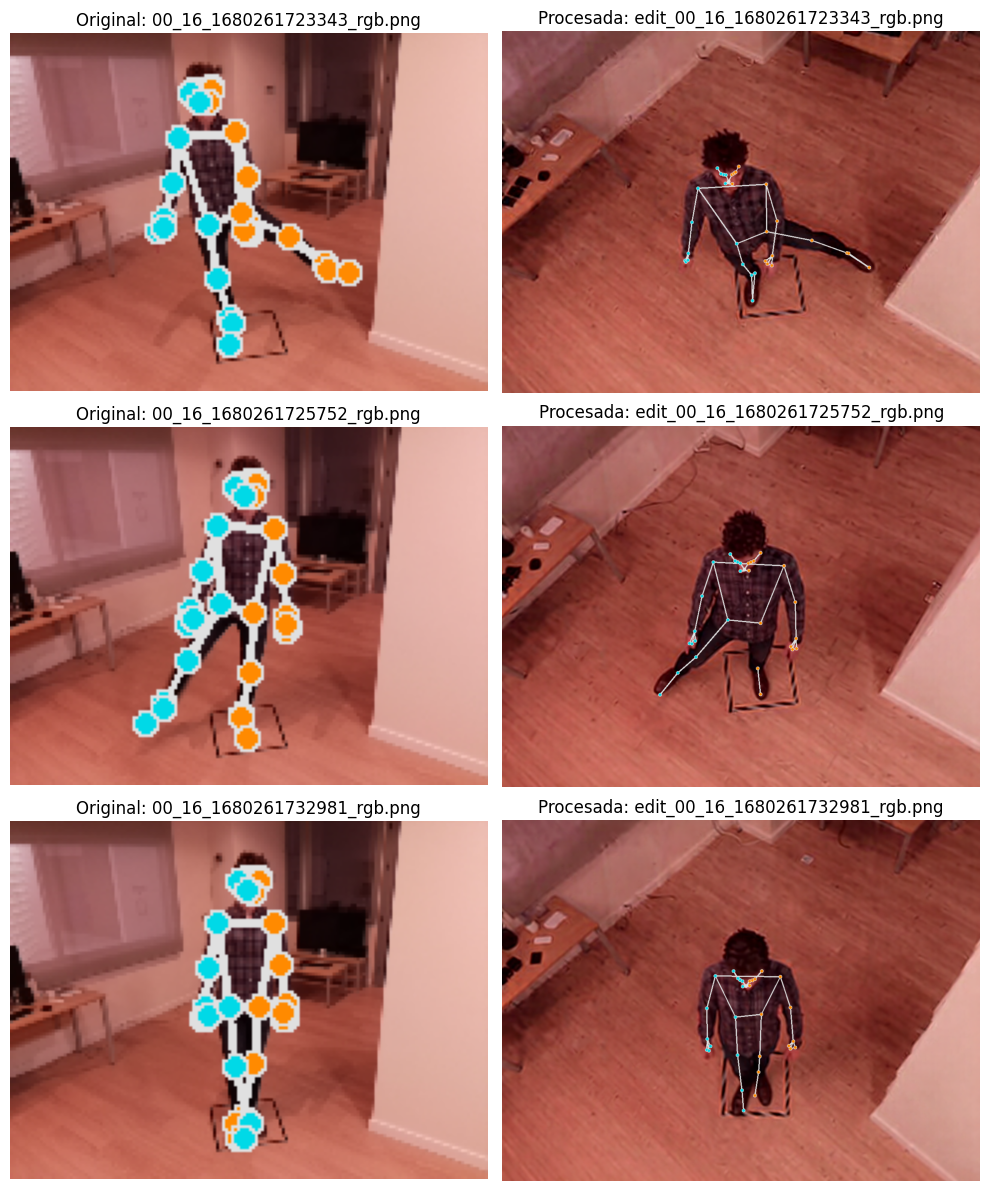

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# -------- CONFIGURACIÓN --------
base_original = Path("fotos_entrada/new")
base_processed = Path("fotos_salida")
image_names = [
    "00_16_1680261723343_rgb.png",
    "00_16_1680261725752_rgb.png",
    "00_16_1680261732981_rgb.png",
]

# -------- FUNCIÓN AUXILIAR --------
def load_and_draw_pose(image_path):
    """
    Carga una imagen y dibuja los landmarks de MediaPipe Pose.
    Si no encuentra la imagen, devuelve un placeholder negro.
    """
    image_bgr = cv2.imread(str(image_path))
    if image_bgr is None:
        print(f"⚠️ No se pudo abrir la imagen: {image_path}")
        return np.zeros((480, 640, 3), dtype=np.uint8)

    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image_bgr,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style()
        )

    return cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# -------- VISUALIZACIÓN DE PARES --------
fig, axes = plt.subplots(
    nrows=len(image_names),
    ncols=2,
    figsize=(10, 4 * len(image_names))
)

# Manejo caso 1 imagen
if len(image_names) == 1:
    axes = [axes]

for i, name in enumerate(image_names):
    orig_path = base_original / name
    proc_path = base_processed / f"edit_{name}"  # <--- ruta corregida

    img_orig = load_and_draw_pose(orig_path)
    img_proc = load_and_draw_pose(proc_path)

    axes[i][0].imshow(img_orig)
    axes[i][0].set_title(f"Original: {name}")
    axes[i][0].axis("off")

    axes[i][1].imshow(img_proc)
    axes[i][1].set_title(f"Procesada: edit_{name}")
    axes[i][1].axis("off")

plt.tight_layout()
plt.show()


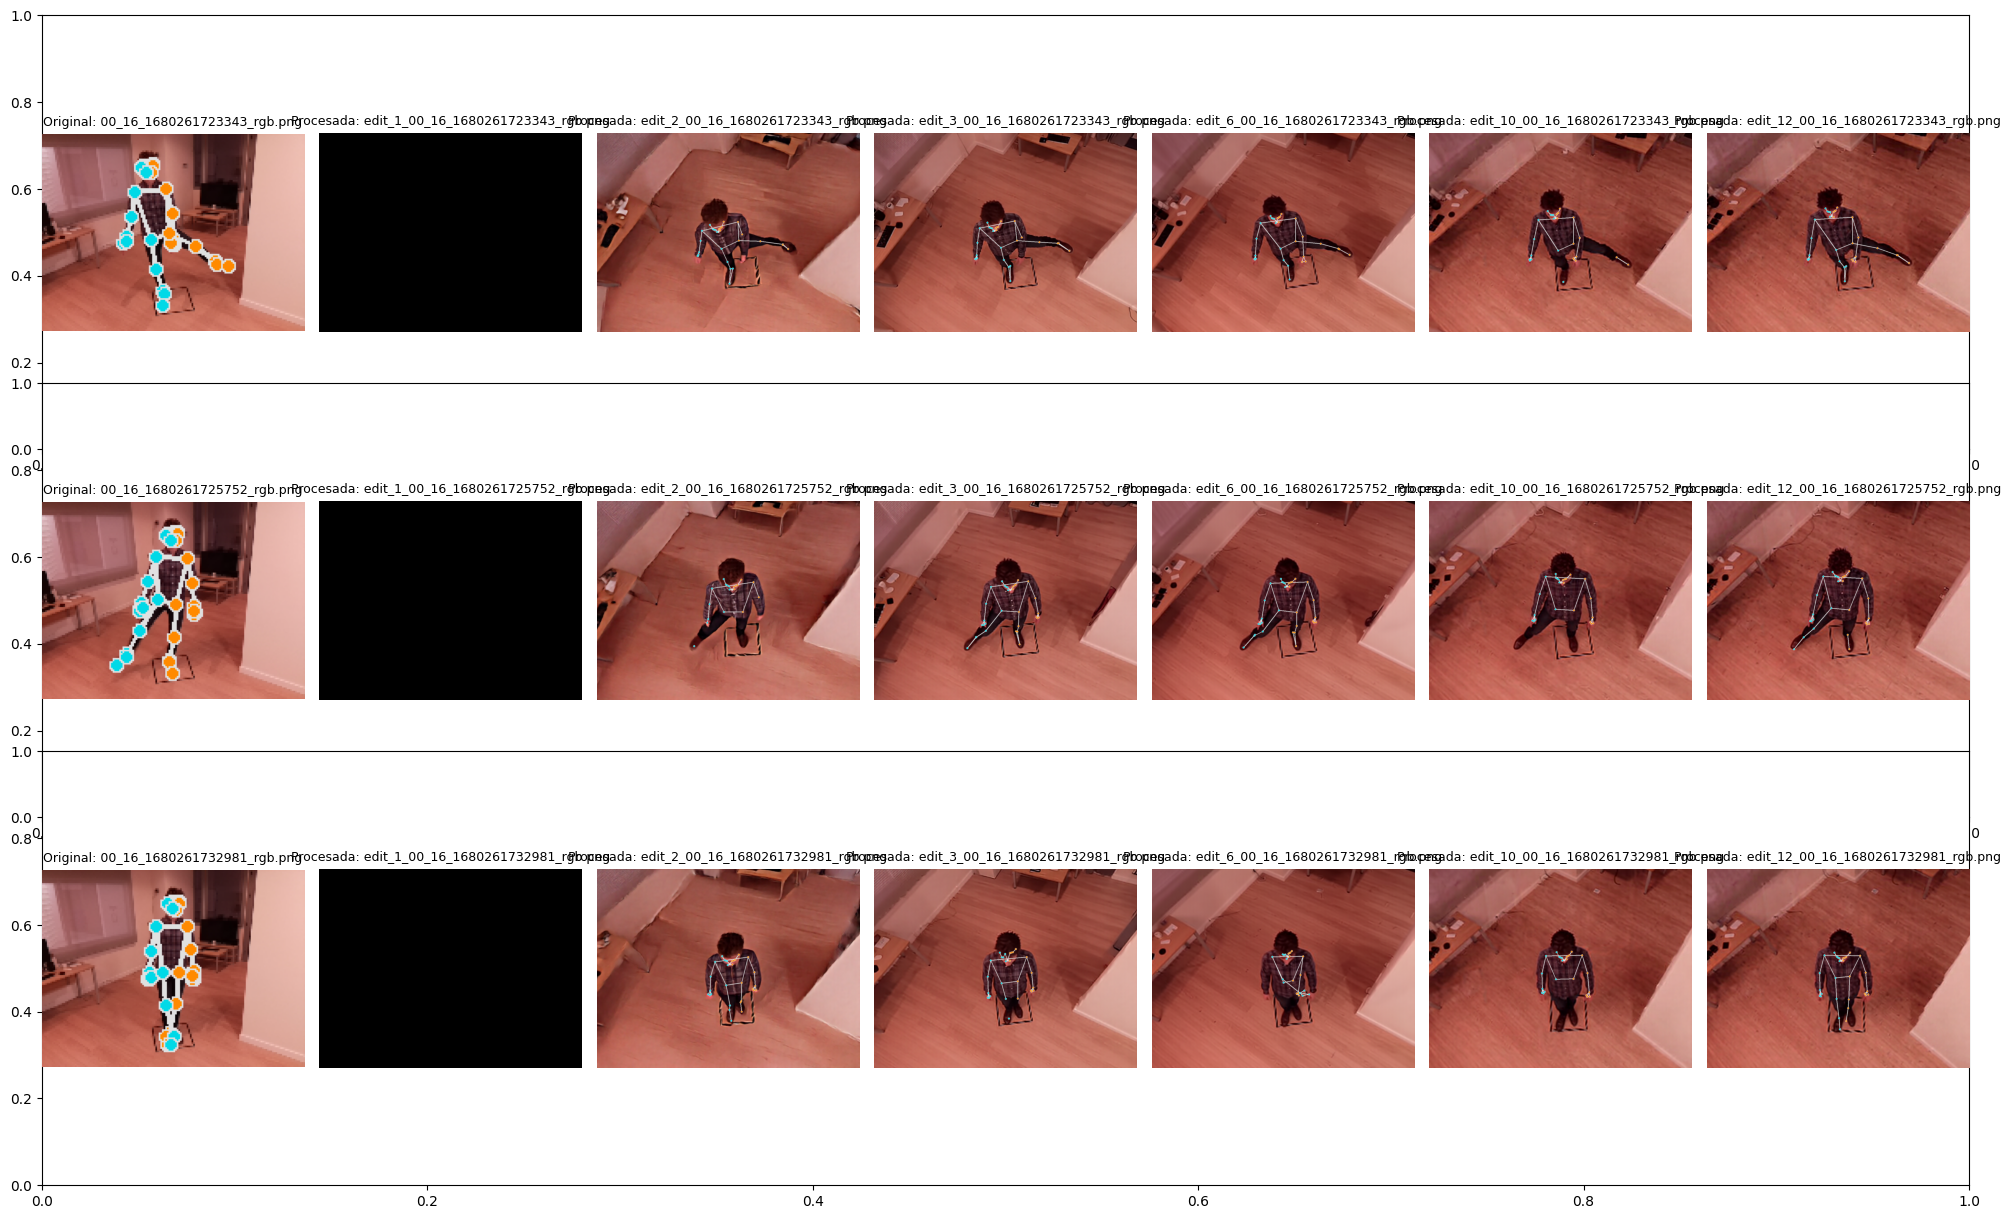

In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import re

# -------- CONFIGURACIÓN --------
base_original = Path("fotos_entrada/new")
base_processed = Path("fotos_salida")
image_names = [
    "00_16_1680261723343_rgb.png",
    "00_16_1680261725752_rgb.png",
    "00_16_1680261732981_rgb.png",
]

# -------- FUNCIÓN AUXILIAR --------
def load_and_draw_pose(image_path):
    """
    Carga una imagen y dibuja los landmarks de MediaPipe Pose.
    Si no encuentra la imagen, devuelve un placeholder negro.
    """
    image_bgr = cv2.imread(str(image_path))
    if image_bgr is None:
        print(f"⚠️ No se pudo abrir la imagen: {image_path}")
        return np.zeros((480, 640, 3), dtype=np.uint8)

    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image_bgr,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style()
        )

    return cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# -------- FUNCIÓN PARA OBTENER VERSIÓN PROCESADAS --------
def get_processed_versions(base_processed, original_name):
    """
    Devuelve lista de paths de todas las imágenes procesadas que corresponden a la original.
    Busca archivos que empiecen con 'edit_<n>_' seguido del nombre original.
    Ordena por número <n>.
    """
    pattern = re.compile(rf"edit_(\d+)_.*{re.escape(original_name)}$")
    matches = []
    for file in base_processed.iterdir():
        if file.is_file():
            m = pattern.match(file.name)
            if m:
                matches.append((int(m.group(1)), file))
    # Ordenar por número
    matches.sort(key=lambda x: x[0])
    return [file for _, file in matches]

# -------- VISUALIZACIÓN --------
fig, axes = plt.subplots(
    nrows=len(image_names),
    ncols=1,  # Cada fila va a ser original + procesadas
    figsize=(5 * (1 + 3), 4 * len(image_names))  # 3 procesadas máximo por defecto, ajusta si más
)

if len(image_names) == 1:
    axes = [axes]

for i, name in enumerate(image_names):
    orig_path = base_original / name
    processed_files = get_processed_versions(base_processed, name)

    # Cargar imagen original
    imgs_row = [load_and_draw_pose(orig_path)]
    titles_row = [f"Original: {name}"]

    # Cargar todas las versiones procesadas
    for pf in processed_files:
        imgs_row.append(load_and_draw_pose(pf))
        titles_row.append(f"Procesada: {pf.name}")

    # Crear subplots dinámicos en la fila actual
    ncols = len(imgs_row)
    for j, img in enumerate(imgs_row):
        ax = plt.subplot(len(image_names), max(len(imgs_row), 2), i * max(len(imgs_row), 2) + j + 1)
        ax.imshow(img)
        ax.set_title(titles_row[j], fontsize=9)
        ax.axis("off")

plt.tight_layout()
plt.show()


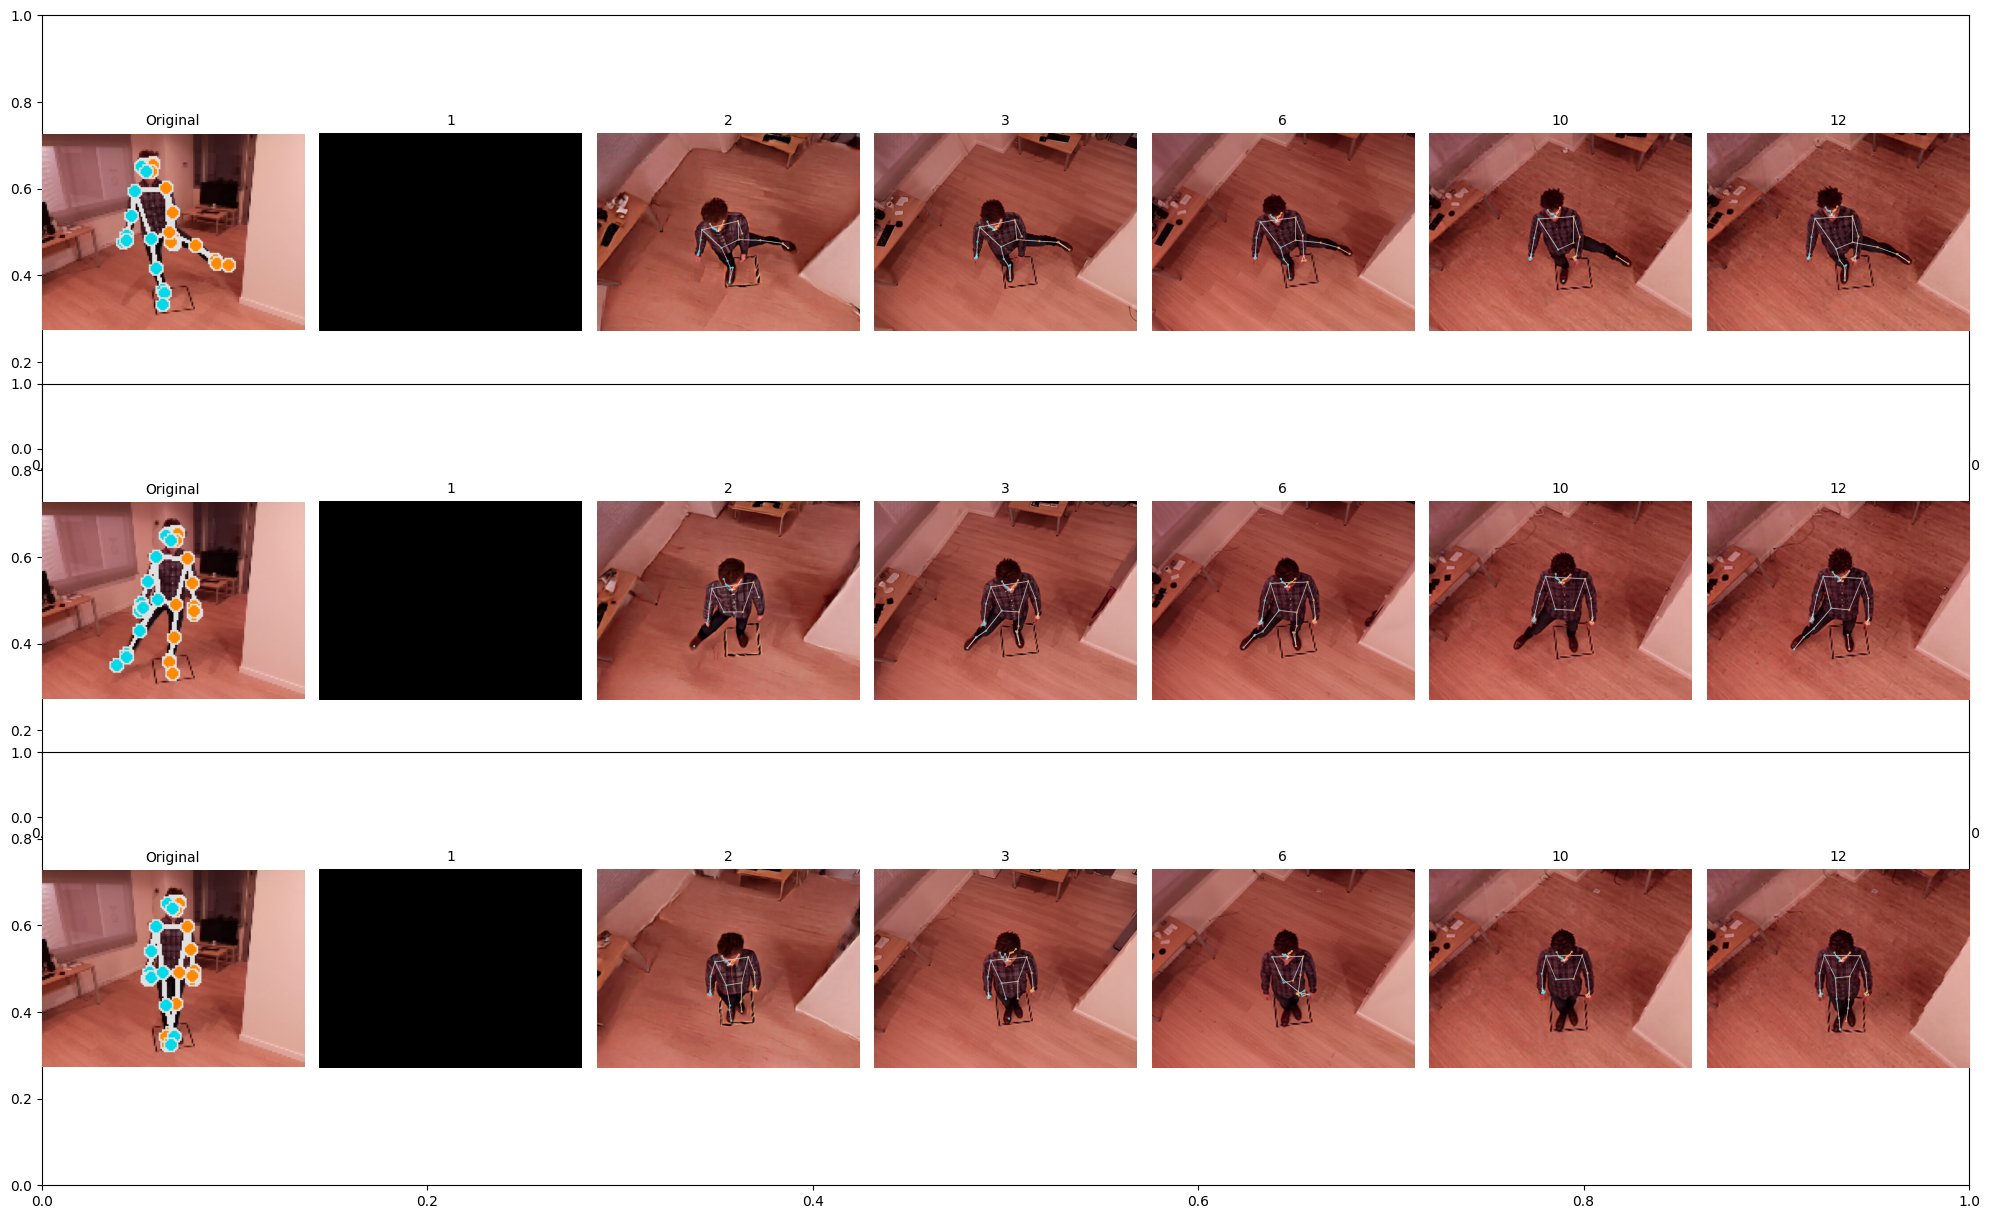

In [22]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import re

# -------- CONFIGURACIÓN --------
base_original = Path("fotos_entrada/new")
base_processed = Path("fotos_salida")
image_names = [
    "00_16_1680261723343_rgb.png",
    "00_16_1680261725752_rgb.png",
    "00_16_1680261732981_rgb.png",
]

# -------- FUNCIÓN AUXILIAR --------
def load_and_draw_pose(image_path):
    """
    Carga una imagen y dibuja los landmarks de MediaPipe Pose.
    Si no encuentra la imagen, devuelve un placeholder negro.
    """
    image_bgr = cv2.imread(str(image_path))
    if image_bgr is None:
        print(f"⚠️ No se pudo abrir la imagen: {image_path}")
        return np.zeros((480, 640, 3), dtype=np.uint8)

    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image_bgr,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style()
        )

    return cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# -------- FUNCIÓN PARA OBTENER VERSIÓN PROCESADAS --------
def get_processed_versions(base_processed, original_name):
    """
    Devuelve lista de tuplas (número, path) de todas las imágenes procesadas que corresponden a la original.
    Busca archivos que empiecen con 'edit_<n>_' seguido del nombre original.
    Ordena por número <n>.
    """
    pattern = re.compile(rf"edit_(\d+)_.*{re.escape(original_name)}$")
    matches = []
    for file in base_processed.iterdir():
        if file.is_file():
            m = pattern.match(file.name)
            if m:
                matches.append((int(m.group(1)), file))
    matches.sort(key=lambda x: x[0])
    return matches  # devuelve lista de tuplas (número, path)

# -------- VISUALIZACIÓN --------
fig, axes = plt.subplots(
    nrows=len(image_names),
    ncols=1,  # cada fila tendrá original + procesadas
    figsize=(5 * 4, 4 * len(image_names))  # ancho estimado para varias columnas
)

if len(image_names) == 1:
    axes = [axes]

for i, name in enumerate(image_names):
    orig_path = base_original / name
    processed_files = get_processed_versions(base_processed, name)

    # Cargar imagen original
    imgs_row = [load_and_draw_pose(orig_path)]
    titles_row = ["Original"]

    # Cargar todas las versiones procesadas y usar solo el número para el título
    for n, pf in processed_files:
        imgs_row.append(load_and_draw_pose(pf))
        titles_row.append(str(n))  # <-- solo el número

    # Crear subplots dinámicos en la fila actual
    ncols = len(imgs_row)
    for j, img in enumerate(imgs_row):
        ax = plt.subplot(len(image_names), max(len(imgs_row), 2), i * max(len(imgs_row), 2) + j + 1)
        ax.imshow(img)
        ax.set_title(titles_row[j], fontsize=10)
        ax.axis("off")

plt.tight_layout()
plt.show()



In [23]:
fig.savefig("poses_comparadas.png", dpi=300, bbox_inches="tight")